<a href="https://colab.research.google.com/github/jagapathi479/Data-exploration-and-visualization/blob/main/income%20prediction%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


SVM Results
Accuracy: 0.8524489482573315
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4942
           1       0.77      0.56      0.65      1571

    accuracy                           0.85      6513
   macro avg       0.82      0.75      0.78      6513
weighted avg       0.85      0.85      0.84      6513



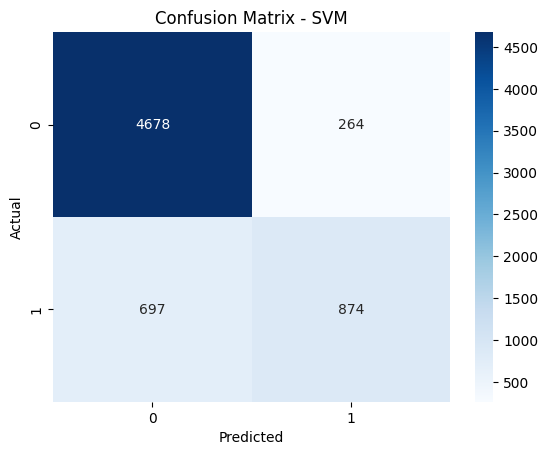


Random Forest Results
Accuracy: 0.852141870105942
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      4942
           1       0.72      0.64      0.68      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



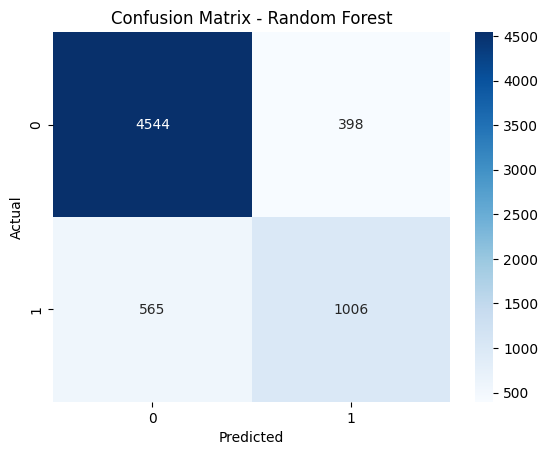


Logistic Regression Results
Accuracy: 0.8258866881621373
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.72      0.46      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.73      6513
weighted avg       0.81      0.83      0.81      6513



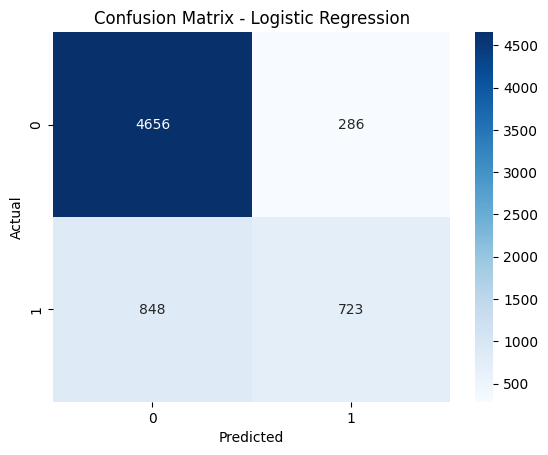

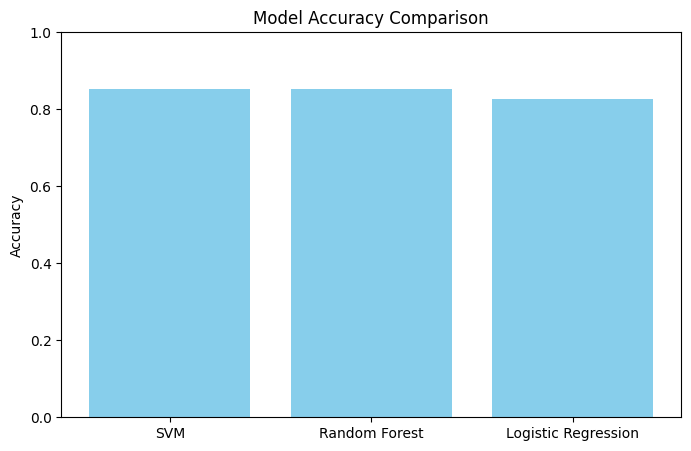


Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}

Sample Input Prediction (AI System Simulated):  <=50K


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv('/content/adult.csv')

# Drop the invalid column
df.drop(columns=[df.columns[-1]], inplace=True)

# Replace '?' with NaN and drop those rows
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Drop unnecessary column: 'fnlwt' is not useful in modeling
df.drop(columns=['fnlwt'], inplace=True)

# Label encode categorical features
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    if column != 'income':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode target column
target_encoder = LabelEncoder()
df['income'] = target_encoder.fit_transform(df['income'])  # <=50K:0, >50K:1

# Split features and target
X = df.drop('income', axis=1)
y = df['income']

# Split into training and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Store results
accuracies = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

    print(f"\n{name} Results")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot accuracy comparison
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Hyperparameter tuning for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tuner = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
tuner.fit(X_train_scaled, y_train)
print("\nBest Random Forest Parameters:", tuner.best_params_)

# Predict income for one sample
sample_input = X_test.iloc[[0]]
sample_scaled = scaler.transform(sample_input)
sample_pred = target_encoder.inverse_transform([models['Random Forest'].predict(sample_scaled)[0]])

print("\nSample Input Prediction (AI System Simulated):", sample_pred[0])
